In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3.iv 

In [158]:
def simulation(M,N,T,S0,kappa,gamma,Sbar,sigma):
    h = T / N
    S = np.zeros((N, M))
    S[0] = 1
    for t in range(1, N):
        Z = np.random.standard_normal(M)
        S[t] = S[t - 1] + kappa * S[t - 1] * (Sbar - np.log(S[t - 1])) * h \
                        + sigma * (S[t - 1] ** (gamma + 1)) * np.sqrt(h) * Z
    return S

In [309]:
# simulation time
M = 1000
# steps
N = 1000
# step length
T = 1
# parameters
kappa = 10
gamma = 0
Sbar = np.log(100)
sigma = 0.2
S0 = 100

In [310]:
S = simulation(M,N,T,S0,kappa,gamma,Sbar,sigma)

In [311]:
# simulated mean
np.log(S[-1]).mean()

4.602533513743357

In [312]:
# exact mean
np.exp(-kappa*T)*np.log(S0)+(Sbar-1/(2*kappa)*sigma**2)*(1-np.exp(-kappa*T))

4.603170276787952

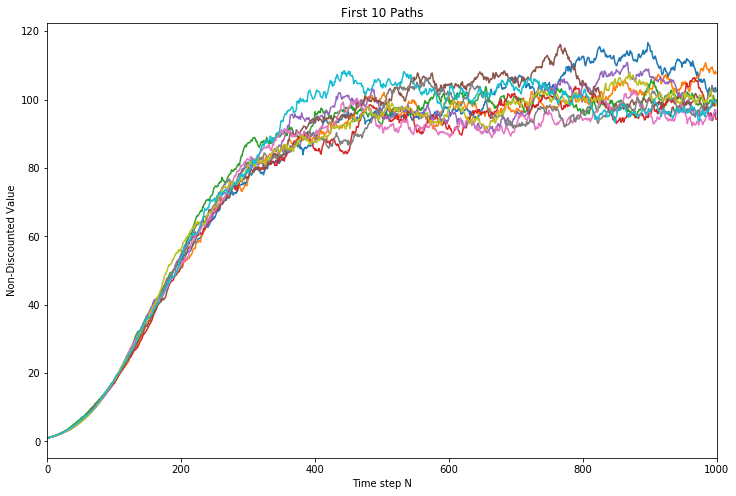

In [313]:
# plot First 10 simulated Paths
plt.figure(figsize=(12,8))
plt.plot(S[:,0:10])
plt.xlim([0, N])
plt.ylabel("Non-Discounted Value")
plt.xlabel("Time step N")
plt.title("First 10 Paths")
plt.show()

# 3.v 

In [298]:
# simulation time
M = 100
# step length
T = 1
# parameters
kappa = 10
gamma = 0
Sbar = 30#np.log(120)
sigma = 0.2
S0 = 100

In [315]:
simu_list = []
for N in range(10,100,1):
    S = simulation(M,N,T,S0,kappa,gamma,Sbar,sigma)
    # simulated mean
    simulated_value = np.log(S[-1]).mean()
    simu_list.append(simulated_value)

In [304]:
exact_value = np.exp(-kappa*T)*np.log(S0)+(Sbar-1/(2*kappa)*sigma**2)*(1-np.exp(-kappa*T))

Text(0.5, 1.0, 'Simulated value when steps vary')

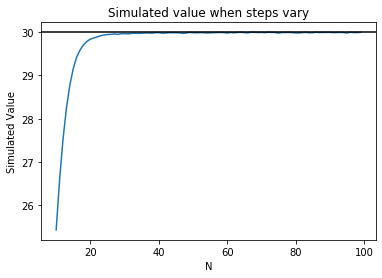

In [307]:
plt.plot(range(10,100,1), simu_list)
plt.axhline(exact_value, c="k", xmin=0, xmax=500, label="Exact")
plt.ylabel("Simulated Value")
plt.xlabel("N")
plt.title("Simulated value when steps vary")

Text(0.5, 1.0, 'abs error when steps vary')

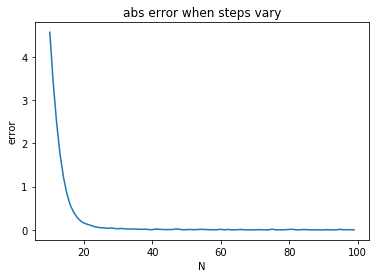

In [308]:
error = abs(simu_list - exact_value)
plt.plot(range(10,100,1), error)
plt.ylabel("error")
plt.xlabel("N")
plt.title("abs error when steps vary")